## 1a
On a large sample size with a small number of predictors, we would expect a more flexible model to perform better than a less flexible model because it would not be subject to much variance (due to the large sample size), but would have the benefit of more closely fitting the data due to its flexibility, reducing bias.

## 1b
If the number of predictors is large but the number of observations is small, we would expect a more flexible model to perform worse than a less flexible model because it would be subject to more variance (due to the small sample size). While using a less flexible model would introduce more bias, this would likely be a better tradeoff due to the likelihood of the flexible model fitting error in the data set.

## 1c
If the relationship between predictors and response is highly non-linear, a flexible model would better fit the data by reducing bias, regardless of the sample size.

## 1d
If the variance of the error terms is extremely high, a flexible model would likely perform worse because of its tendency to fit the inherent error in the training data.

## 2a
This is a regression problem. We are most interested in inference to understand the relationship between possible predictors and response. The n is 500 and the p is 3.

## 2b
This is a classification problem. We are most interested in prediction because we want accurate performance on test data. The n is 20 and p is 13.

## 2c
This is a regression problem. We are most interested in prediction because we want accurate performance on test data. The n is 52 and p is 3.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

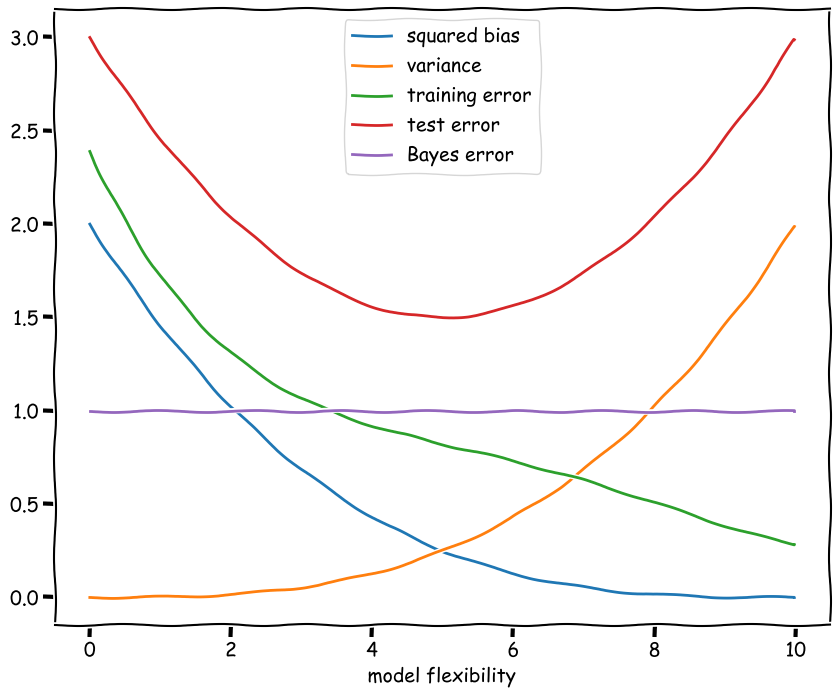

In [4]:
# 3a - leveraging code from the solutions
# Essentially, any form of the following would be correct:
# monotonically decreasing squared bias
# monotonically increasing variance
# monotonically decreasing training error
# initially decreasing, then increasing test error
# constant Bayes (irreducible) error

# the functions chosen here were chosen just as a rough, quick way to sketch the functions in a plot
# they do not represent in any way an analytical formula for these quantities or anything of the sort
# these formulas would depend on the model and fitting procedure in any case

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 10.0, 0.02)

def squared_bias(x):
    return .002*(-x+10)**3
def variance(x):
    return .002*x**3 
def training_error(x):
    return 2.38936 - 0.825077*x + 0.176655*x**2 - 0.0182319*x**3 + 0.00067091*x**4
def test_error(x):
    return 3 - 0.6*x + .06*x**2
def bayes_error(x):
    return x + 1 - x

plt.xkcd();
#frame = plt.gca()
#frame.axes.xaxis.set_ticklabels([])
plt.figure(figsize=(10, 8))
plt.plot(x,squared_bias(x), label='squared bias')
plt.plot(x, variance(x), label='variance')
plt.plot(x, training_error(x), label='training error')
plt.plot(x, test_error(x), label='test error')
plt.plot(x, bayes_error(x), label='Bayes error')
plt.legend(loc='upper center')
plt.xlabel('model flexibility')
plt.show();

#arbitrary units

## 3b
Bias decreases as flexibility increases because flexible models maintain the complexity of the underlying relationship between predictors and responses.

Variance increases as flexibility increases because flexible models are more prone to overfitting and will change more drastically with changes to the training data.

Training error decreases as flexibility increases because flexible models approach an exact fit of the training data.

Training error initially decreases and then increases as flexibility increases because flexible models initially reduce bias and better reperesent the complexity of the underlying relationship between predictors and responses until a minimum test error is reached. However, as flexibility surpasses the complexity of the relationship between predictors and responses, the model experiences overfitting to the training data and loses test accuracy.

Bayes (irreducible) error remains constant as it is inherent to the data and is independent of the flexibility of the model chosen to represent the relationship between predictors and responses.

In [6]:
# 7a
import numpy as np
import pandas as pd
test_point = np.array([0,0,0])
df = pd.read_csv('problem7.csv')
df['euclidean_distance'] = np.linalg.norm(df[['x1', 'x2', 'x3']].values - test_point, axis=1)
df

,x1,x2,x3,y,euclidean_distance
0,0,3,0,red,3.000000
1,2,0,0,red,2.000000
2,0,1,3,red,3.162278
3,0,1,2,green,2.236068
4,-1,0,1,green,1.414214
5,1,1,1,red,1.732051


In [23]:
# 7b
k1_index = df['euclidean_distance'].idxmin()
prediction = df.loc[k1_index]
prediction['y']

'green'

In [24]:
k3_rows = df.nsmallest(3, 'euclidean_distance')
prediction = k3_rows['y'].value_counts().idxmax()
prediction

'red'